<div style="display: flex; align-items: center;">
  <div style="flex: 1; max-width: 70%;">
    MSCI is a Python package designed to evaluate the information content of peptide fragmentation spectra. Our objective was to compute an information-content index for all peptides within a given proteome. This would allow us to devise data acquisition and analysis strategies that generate and prioritize the most informative fragment ions for peptide quantification.
  </div>
  <img src="https://github.com/proteomicsunitcrg/MSCI/raw/main/docs/MSCI_logo.png" width="300" style="margin-left: 20px;">
</div>


#Download MSCI package and necessary installations

In [1]:
!git clone https://github.com/proteomicsunitcrg/MSCI.git
! pip install matchms
# do not restart session if asked (press cancel matchms since probably you already have matchms installed )
%cd MSCI
import sys
sys.path.append('/content/MSCI')


Cloning into 'MSCI'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 302 (delta 155), reused 215 (delta 139), pack-reused 57
Receiving objects: 100% (302/302), 1.61 MiB | 4.60 MiB/s, done.
Resolving deltas: 100% (157/157), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 31.4 MB/s eta 0:00:00
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=94a49fb47912fc0a08016e335e27f85b423a70fc2e2f6ce9038ad4d8960ce165
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy
  Atte

/content/MSCI


# Import


In [2]:
from MSCI.Preprocessing.Koina import PeptideProcessor
from MSCI.Grouping_MS1.Grouping_mw_irt import process_peptide_combinations
from MSCI.Preprocessing.read_msp_file import read_msp_file
from MSCI.Similarity.spectral_angle_similarity import process_spectra_pairs
from matchms.importing import load_from_msp
import random
import numpy as np
import pandas as pd


# Genrate predicted dataset

###  Download the list of peptides of interest


In [3]:
# List of standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to generate a single tryptic peptide
def generate_tryptic_peptide(min_length=8, max_length=20):
    length = random.randint(min_length, max_length - 1)
    peptide = ''.join(random.choices(amino_acids, k=length))
    peptide += random.choice('KR')
    return peptide

# Generate a list of 100 random tryptic peptides
tryptic_peptides = [generate_tryptic_peptide() for _ in range(100)]

last_peptide_length = random.randint(5, 20)
last_peptide = ''.join(random.choices(amino_acids, k=last_peptide_length))
tryptic_peptides[-1] = last_peptide

with open('random_tryptic_peptides.txt', 'w') as f:
    for peptide in tryptic_peptides:
        f.write(f"{peptide}\n")

print("Generated 100 random tryptic peptides and saved to 'random_tryptic_peptides.txt'.")


Generated 100 random tryptic peptides and saved to 'random_tryptic_peptides.txt'.


### Predict with Koina

#### If available your own list of peptides

In [4]:
processor = PeptideProcessor(
    input_file="random_tryptic_peptides.txt",
    collision_energy=30,
    charge=2,
    model_intensity="Prosit_2020_intensity_HCD",
    model_irt="Prosit_2019_irt"
)

processor.process('random_tryptic_peptides.msp')

# Load dataset


In [5]:
# You can use your own spectra
File= 'random_tryptic_peptides.msp'
spectra = list(load_from_msp(File))

2024-07-23 14:13:17,777:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,785:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,790:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,797:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,804:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,813:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,818:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,826:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,832:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,837:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,841:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,845:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,850:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,854:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,857:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,863:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,868:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,873:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,886:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,890:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,897:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,902:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,909:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,917:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,925:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,931:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,939:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,946:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,954:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,964:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,973:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:17,983:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,039:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,055:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,062:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,109:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,120:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,125:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,160:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,181:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,188:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,198:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,207:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,214:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,221:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,229:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,251:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,266:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,275:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,283:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,300:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,313:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,332:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,350:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,498:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,523:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,549:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,556:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,566:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,573:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,579:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,584:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,589:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,604:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,615:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,621:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,633:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,643:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,648:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,667:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,698:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,708:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,715:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,720:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,727:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,745:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,749:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,753:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,757:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,760:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,763:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,767:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,771:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,774:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,778:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,782:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,786:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,790:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,794:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,798:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,802:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,805:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,809:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,813:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,817:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,820:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,824:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,828:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,832:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2024-07-23 14:13:18,836:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


# Group within MS1 tolerance

In [6]:
mz_tolerance = 5
irt_tolerance = 50


mz_irt_df = read_msp_file(File)
Groups_df = process_peptide_combinations(mz_irt_df, mz_tolerance, irt_tolerance, use_ppm=False)

Groups_df

,index1,index2,peptide 1,peptide 2,m/z 1,m/z 2,iRT 1,iRT 2
0,14,31,PVELNLETGIFGFR/2,LQTWQIFHLVGMK/2,796.427573,800.937054,150.321045,133.027130
1,11,87,WISQSLKFLVWEFHK/2,LEFSNINMLMIFAPFR/2,974.527621,971.999524,138.482361,163.876480
2,74,86,GCEWEMAMRCPAPFFGPQK/2,ESQTNGNNWVKWSPPSPVR/2,1092.977942,1092.035058,115.123734,75.837006
3,37,86,ETNQESEVMRFWHFAIR/2,ESQTNGNNWVKWSPPSPVR/2,1090.520730,1092.035058,121.179474,75.837006
4,13,39,CWHEIDTFFHQYGRRSQGK/2,ALKTYDWVKKYEMCMHPDK/2,1198.061086,1193.573260,69.598907,71.576225
5,34,55,YFNHEDCISR/2,KQEVPTTFPSR/2,642.277311,645.346052,14.993286,22.623009
6,37,74,ETNQESEVMRFWHFAIR/2,GCEWEMAMRCPAPFFGPQK/2,1090.520730,1092.977942,121.179474,115.123734
7,42,91,AALHWKAPTGK/2,IIGSSWGYHR/2,590.335290,588.301447,17.545467,40.351646
8,10,72,PQDIFDHAFQGHK/2,WSTPCDNPFTHDK/2,770.370590,774.332815,55.859516,61.337048
9,34,41,YFNHEDCISR/2,EWPWPRMKR/2,642.277311,643.334767,14.993286,61.232903


# Calculate similarity within fragment tolerance


In [7]:
Groups_df.columns = Groups_df.columns.str.strip()
index_array = Groups_df[['index1','index2']].values.astype(int)
result = process_spectra_pairs(index_array, spectra,  mz_irt_df, tolerance =0, ppm=10)
result

,index1,index2,peptide 1,peptide 2,m/z 1,m/z 2,iRT 1,iRT 2,similarity_score
0,14,31,PVELNLETGIFGFR/2,LQTWQIFHLVGMK/2,796.427573,800.937054,150.321045,133.027130,0.000000
1,11,87,WISQSLKFLVWEFHK/2,LEFSNINMLMIFAPFR/2,974.527621,971.999524,138.482361,163.876480,0.000000
2,74,86,GCEWEMAMRCPAPFFGPQK/2,ESQTNGNNWVKWSPPSPVR/2,1092.977942,1092.035058,115.123734,75.837006,0.000000
3,37,86,ETNQESEVMRFWHFAIR/2,ESQTNGNNWVKWSPPSPVR/2,1090.520730,1092.035058,121.179474,75.837006,0.002870
4,13,39,CWHEIDTFFHQYGRRSQGK/2,ALKTYDWVKKYEMCMHPDK/2,1198.061086,1193.573260,69.598907,71.576225,0.000158
5,34,55,YFNHEDCISR/2,KQEVPTTFPSR/2,642.277311,645.346052,14.993286,22.623009,0.000269
6,37,74,ETNQESEVMRFWHFAIR/2,GCEWEMAMRCPAPFFGPQK/2,1090.520730,1092.977942,121.179474,115.123734,0.000000
7,42,91,AALHWKAPTGK/2,IIGSSWGYHR/2,590.335290,588.301447,17.545467,40.351646,0.000000
8,10,72,PQDIFDHAFQGHK/2,WSTPCDNPFTHDK/2,770.370590,774.332815,55.859516,61.337048,0.000213
9,34,41,YFNHEDCISR/2,EWPWPRMKR/2,642.277311,643.334767,14.993286,61.232903,0.003941


# Plot results

### Plot spectra of interest using matchms

Name    PVELNLETGIFGFR/2
MW            796.427573
iRT           150.321045
Name: 14, dtype: object
Name    LQTWQIFHLVGMK/2
MW           800.937054
iRT           133.02713
Name: 31, dtype: object


(<Figure size 1600x1200 with 1 Axes>,
 <Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

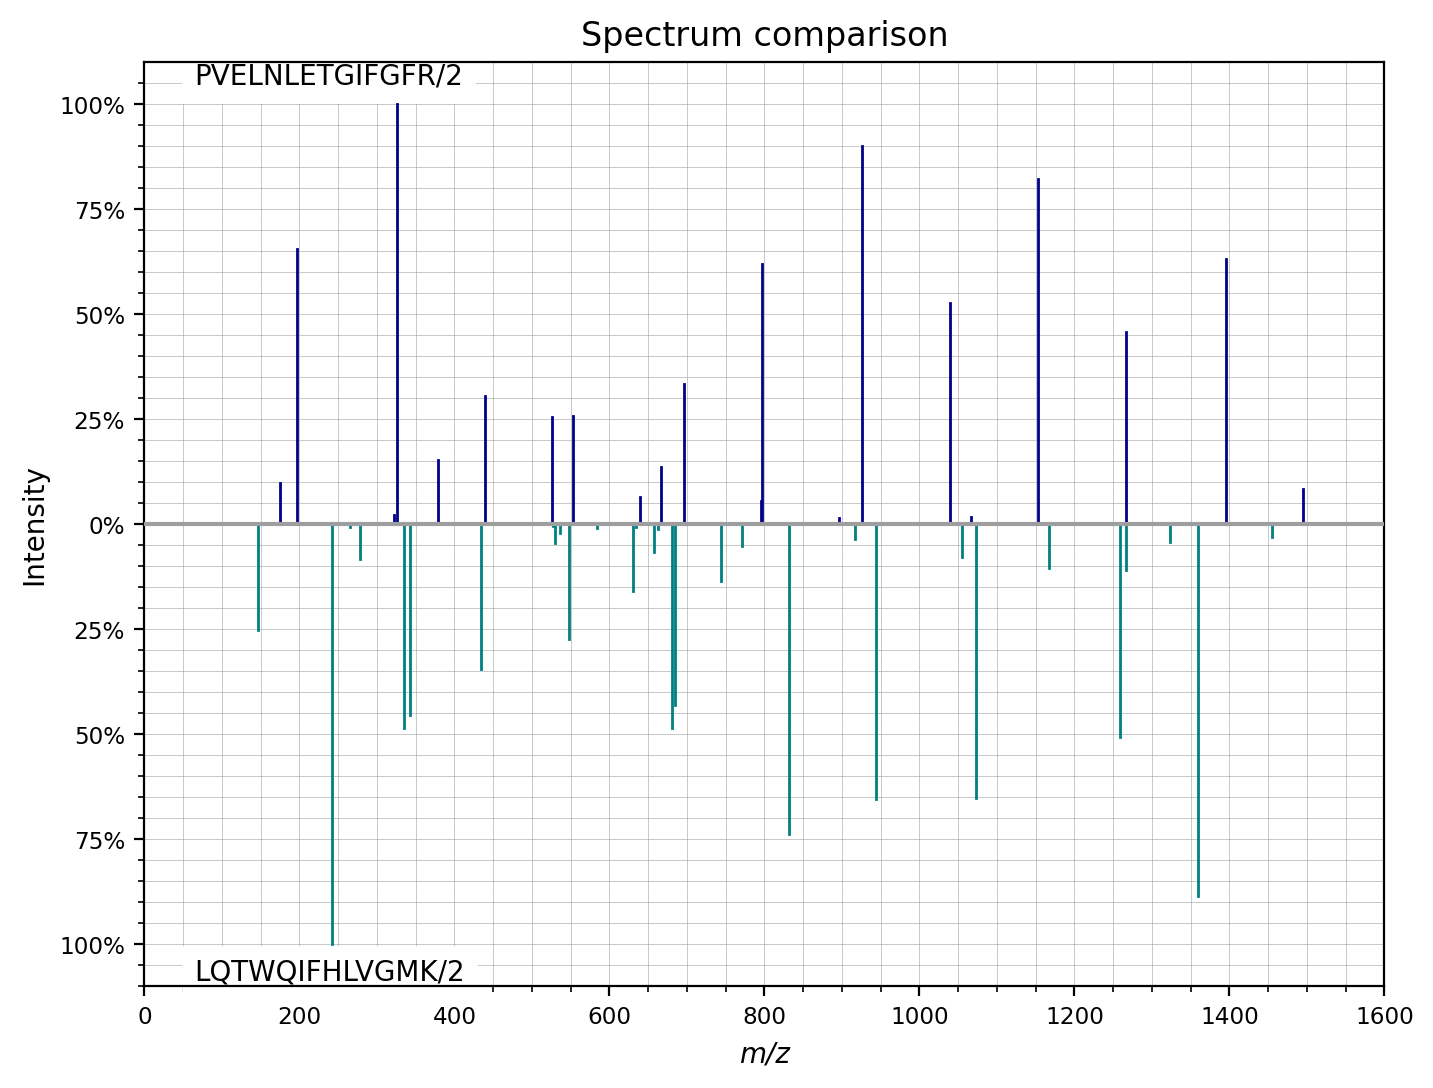

In [8]:
print(mz_irt_df.iloc[14])
print(mz_irt_df.iloc[31])
spectra[14].plot_against(spectra[31])